### 원문 벡터 db + QA 벡터 DB (앙상블) -> 답변 평가 후 -> 3개의 검색 쿼리 재생성 -> 재실행
```
extract_queries → split_queries → tool → qa_tool → basic 
→ evaluate ── good → END
            └─ bad → 질문 재생성 → tool → qa_tool → basic → evaluate → END
```

- 3개의 검색 쿼리
    - 영문 질문
    - 한글 질문
    - 가짜 문서

```
[검색 방식 - 앙상블]
Dense : 태그 필터 적용 +  top-k 5
BM25: 태그별 BM25Retriever 생성 +  top-k 5
/ 한국어 형태소 분석기 적용 X
=> Hybrid Ensemble: 두 결과를 합쳐서, 가중치 0.8 (Dense) : 0.2 (BM25)
```

In [1]:
from pathlib import Path
import sys

root = Path.cwd()
while not (root / "utils_v8").exists() and root != root.parent:
    root = root.parent
sys.path.insert(0, str(root))

from utils_v8.main3 import (run_langraph)

c:\Users\playdata2\miniconda3\envs\final-clean\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Workspaces\SKN14-Final-1Team-AI\LLM_hybrid\utils_v8\retriever.py:51: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vs = Chroma(


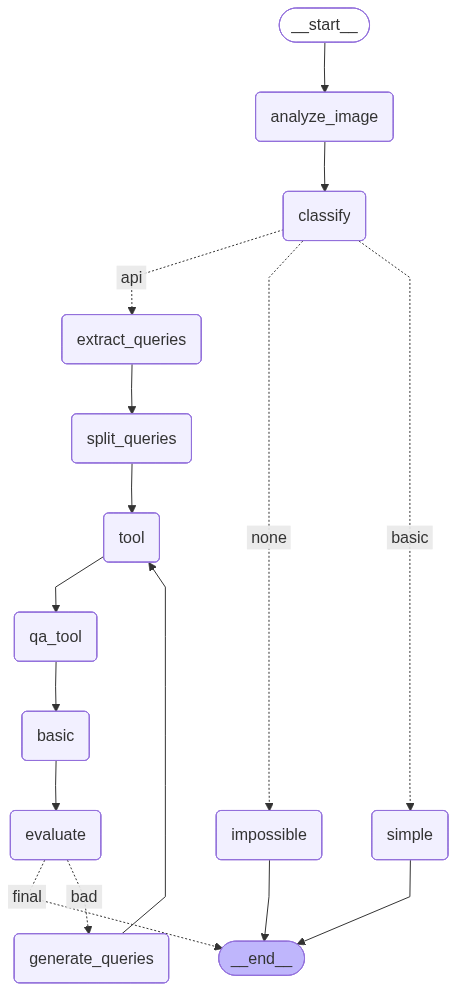

In [2]:
from utils_v8.langgraph_setting2 import graph_setting

graph = graph_setting()

graph

[1차에 답변을 못하는 질문]
- projets.databeses.gte 메서드 쓸때 HTTP 리퀘스트 포맷이 뭐에요?
- COLUMNS가 Dimension API에서 무슨 뜻인가요?
- ttll이 뭐에요? 그리고 한도 같은거 있나요?

In [ ]:
response = run_langraph('projets.databeses.gte 메서드 쓸때 HTTP 리퀘스트 포맷이 뭐에요?', '1', None)
print(response)

In [ ]:
response = run_langraph('ttll이 뭐에요? 그리고 한도 같은거 있나요?', '1', None)
print(response)

In [ ]:
response = run_langraph('COLUMNS가 Dimension API에서 무슨 뜻인가요?', '1', None)
print(response)

In [ ]:
print(response.get('rewritten'))

In [ ]:
response = run_langraph('CSV 파일을 이용해서 S/MIME 인증서를 관리하려면 어떤 작업이 필요한가요?', '1', None)
print(response)

In [ ]:
response = run_langraph('itemDownlodRestrction 뭐에요?', '1', None)
print(response)

In [ ]:
response = run_langraph('As a beginner who is not familiar with Google APIs, could you please explain in detail how the Cloud Platform is affected when Google control features are enabled, and what specific user actions or applications are impacted by these policies?', '1', None)
print(response)

In [3]:
response = run_langraph('GMSMapPoint의 좌표계에서 (0, 0)은 어떤 지점을 의미하나요?', '1', None)
print(response)

run_langraph 호출 - 입력: GMSMapPoint의 좌표계에서 (0, 0)은 어떤 지점을 의미하나요?, 이미지: False
analyze_image 호출됨 - 이미지 존재: False
[tool_based_search_node] 실행 - queries=['GMSMapPoint의 좌표계에서 (0, 0)은 어떤 지점을 의미하나요?']


c:\Workspaces\SKN14-Final-1Team-AI\LLM_hybrid\utils_v8\langgraph_node2.py:206: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  results = retriever.get_relevant_documents(query)


[vector_search_tool] hybrid 검색: 'GMSMapPoint의 좌표계에서 (0, 0)은 어떤 지점을 의미하나요?', tags=['map']

[DEBUG] --- Query ---
Query: GMSMapPoint의 좌표계에서 (0, 0)은 어떤 지점을 의미하나요?, Tags: ['map']

[DEBUG] --- Chroma Results ---
1. [tag=map] GMSProjection [https://developers.google.com/maps/documentation/navigation/ios-sdk/reference/objc/Cl...
2. [tag=map] Declaration
SWIFT
class GMSMapViewOptions : NSObject
OBJECTIVE-C
@interface GMSMapViewOptions : NSOb...
3. [tag=map] Declaration
SWIFT
class GMSMapStyle : NSObject
OBJECTIVE-C
@interface GMSMapStyle : NSObject
GMSMark...
4. [tag=map] GMSAddress [https://developers.google.com/maps/documentation/navigation/ios-sdk/reference/objc/Class...
5. [tag=map] GMSCoordinateBounds in Place Autocomplete (v3.9.0 - v4.0.0)
Several properties andparameters using G...
6. [tag=map] {
  "snappedPoints":
    [
      {
        "location":
          { "latitude": -35.27800489993019, "...
7. [tag=map] GMSCoordinateBounds [https://developers.google.com/maps/documentation/ios-sdk/

In [ ]:
response = run_langraph('파이어베이스 리얼타임 데이터베이스에서 유저 인증 관련 문제 해결법', '1', None)
print(response)

In [ ]:
# print(response['answer'])
# print(response['tool_calls'])
print(response['qa_tool_calls'])

In [ ]:
## 환경설정
!pip install -qU ragas langchain langchain-community langchain-openai langchain-chroma langchain-text-splitters pypdf rapidfuzz langgraph gdown chromadb langchain-huggingface sentence-transformers -q

In [ ]:
!pip install ragas

In [4]:
import os
from dotenv import load_dotenv

load_dotenv()
# 필요한 라이브러리 임포트
import os
import pandas as pd
from pprint import pprint
# LangChain 관련 라이브러리
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
# RAGAS 관련 라이브러리
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from ragas.testset.persona import Persona
from ragas.testset import TestsetGenerator
from ragas import EvaluationDataset, evaluate
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness

## 이미 생성된 합성 데이터셋 생성

In [5]:
import pandas as pd

# 같은 폴더(현재 작업 디렉토리)에 저장했다면
dataset_df = pd.read_csv("./dataset2.csv")
print(dataset_df.shape)
display(dataset_df)

(20, 4)


,user_input,reference_contexts,reference,synthesizer_name
0,CSV 파일을 이용해서 S/MIME 인증서를 관리하려면 어떤 작업이 필요한가요?,['Q: S/MIME 인증서를 관리하기 위해 CSV 파일을 처리하는 함수에서 어떤 ...,"CSV 파일을 처리하는 함수에서는 사용자의 인증서를 나열하고, 기본 인증서가 만료되...",single_hop_specific_query_synthesizer
1,클라우드 파이어스토어 부하 분산기 어떻게 써야되나요?,['Q: Cloud Firestore의 부하 분산 기능은 어떻게 작동하나요?\nA:...,Cloud Firestore는 데이터베이스에 대한 트래픽을 지원하기 위해 자동으로 ...,single_hop_specific_query_synthesizer
2,범위 많으면 동의 어렵나요?,['Q: OAuth 2.0을 사용할 때 요청하는 범위의 수가 사용자 동의에 미치는 ...,요청된 범위 수가 많으면 사용자 동의를 얻을 가능성이 낮아질 수 있습니다.,single_hop_specific_query_synthesizer
3,As a beginner who is not familiar with Google ...,"['Q: Google Cloud 세션 제어 기능이란 무엇이며, 어떤 영향을 미치나요...",When Google Cloud session control features are...,single_hop_specific_query_synthesizer
4,"firebase_functions 어떻게 쓰는지 잘 모르겠는데, Cloud Fire...",['Q: Cloud Firestore에서 특정 문서의 모든 변경에 대해 이벤트를 트...,Cloud Firestore에서 특정 문서의 모든 변경에 이벤트를 트리거하려면 on...,single_hop_specific_query_synthesizer
5,Firebase에서 다단계 인증(MFA)을 사용할 때 Objective-C로 사용자...,['Q: 다단계 인증(MFA) 사용 시 Firebase에서 사용자 인증을 완료하는 ...,다단계 인증(MFA) 사용 시 Firebase에서 사용자 인증을 완료하는 방법은 F...,single_hop_specific_query_synthesizer
6,Java를 사용해서 Firestore에 문서를 추가할 때 어떤 코드를 사용하나요?,['Q: Firestore에서 문서에 데이터를 추가할 때 사용하는 Java 코드 예...,다음은 Java에서 Firestore에 문서를 추가할 때 사용하는 코드 예시입니다....,single_hop_specific_query_synthesizer
7,COLUMNS가 Dimension API에서 무슨 뜻인가요?,['Q: Dimension API에서 사용할 수 있는 열거형 값은 무엇인가요?\nA...,COLUMNS는 Dimension API에서 시트의 열에서 작동함을 의미합니다.,single_hop_specific_query_synthesizer
8,ttll이 뭐에요? 그리고 한도 같은거 있나요?,['Q: TTL 정책을 적용할 때 한도 및 제약조건은 무엇인가요?\nA: 컬렉션 그...,"컬렉션 그룹당 하나의 필드만 TTL 필드로 표시할 수 있고, 필드 수준 구성은 최대...",single_hop_specific_query_synthesizer
9,Me want know what FUNCTION_ENTRYPOINT do in gc...,['Q: gcloud CLI를 사용하여 Cloud Run 함수를 배포한 후 트리거를...,FUNCTION_ENTRYPOINT는 gcloud run deploy 명령어에서 함...,single_hop_specific_query_synthesizer


In [6]:

## 02.RAG 체인 구성

import pandas as pd
from datasets import Dataset
import uuid
import time


evaluated_dataset = []

for _, row in dataset_df.iterrows():
    time.sleep(3)
    query = row.user_input  # 사용자 입력 - 합성 데이터셋에서 가져옴

    # run_langraph 함수 호출
    rag_result = run_langraph(query,'1', None)

    evaluated_dataset.append(
        {
            "user_input": query,
            # "retrieved_contexts": [doc for doc in rag_result["search_results"]],
            "retrieved_contexts": rag_result.get("search_results", []), # basic, none
            "response": rag_result["answer"],
            "reference": row['reference']
        }
    )

print("평가 데이터셋 준비 완료")

# RAGAS 평가 데이터셋 생성
ragas_evaluated_dataset = Dataset.from_list(evaluated_dataset)
# csv 데이터 저장
# ragas_evaluated_dataset.to_pandas().to_csv('ragas_evaluated_dataset_hybrid4.csv', index=False)
ragas_evaluated_dataset.to_pandas().info()

run_langraph 호출 - 입력: CSV 파일을 이용해서 S/MIME 인증서를 관리하려면 어떤 작업이 필요한가요?, 이미지: False
analyze_image 호출됨 - 이미지 존재: False
[tool_based_search_node] 실행 - queries=['CSV 파일을 사용하여 S/MIME 인증서를 관리하는 방법은 무엇인가요?']
[vector_search_tool] hybrid 검색: 'CSV 파일을 사용하여 S/MIME 인증서를 관리하는 방법은 무엇인가요?', tags=['gmail']

[DEBUG] --- Query ---
Query: CSV 파일을 사용하여 S/MIME 인증서를 관리하는 방법은 무엇인가요?, Tags: ['gmail']

[DEBUG] --- Chroma Results ---
1. [tag=gmail] except (OSError, IOError) as error:
    print(f"An error occured while reading the CSV file: {error}...
2. [tag=gmail] --- 탭: Python ---
이전의 create_smime_info 및 insert_smime_info 호출을 사용하여 CSV 파일에 지정된 인증서를 업로드할 수 있습니다.

...
3. [tag=gmail] 이 페이지는 Cloud Translation API [https://cloud.google.com/translate/?hl=ko]를 통해 번역되었습니다.
Switch to Engl...
4. [tag=gmail] /* Class to demonstrate the use of Gmail Insert Certificate from CSV File */
public class InsertCert...
5. [tag=gmail] Args:
    csv_filename: Name of the CSV file.
  """

  try:
    with open(csv_filename, "rb") as cer..

In [7]:
### RAGAS 평가 실행

# LLM 래퍼 생성
evaluator_llm = ChatOpenAI(model="gpt-4.1-mini", temperature=0)
evaluator_llm = LangchainLLMWrapper(evaluator_llm)

# 평가 메트릭 정의
metrics = [
    LLMContextRecall(),  # 검색된 컨텍스트의 회수율
    Faithfulness(),  # 생성된 답변의 충실도
    FactualCorrectness()  # 사실적 정확성
]
# 평가 실행

result = evaluate(
    dataset=ragas_evaluated_dataset,
    metrics=metrics,
    llm=evaluator_llm,
)

print(result)
# 결과를 DataFrame으로 변환
result_df = result.to_pandas()

# 결과 저장
# result_df.to_csv('ragas_evaluation_result_hybrid4.csv', index=False)

display(result_df.head())
result_df[['context_recall', 'faithfulness', 'factual_correctness(mode=f1)']].describe()

Evaluating: 100%|██████████| 60/60 [03:01<00:00,  3.02s/it]


{'context_recall': 0.8500, 'faithfulness': 0.8857, 'factual_correctness(mode=f1)': 0.4135}


,user_input,retrieved_contexts,response,reference,context_recall,faithfulness,factual_correctness(mode=f1)
0,CSV 파일을 이용해서 S/MIME 인증서를 관리하려면 어떤 작업이 필요한가요?,"[except (OSError, IOError) as error:\n prin...",CSV 파일을 이용하여 S/MIME 인증서를 관리하려면 다음과 같은 작업이 필요합니...,"CSV 파일을 처리하는 함수에서는 사용자의 인증서를 나열하고, 기본 인증서가 만료되...",1.0,1.000000,0.15
1,클라우드 파이어스토어 부하 분산기 어떻게 써야되나요?,[Cloud Firestore는 비즈니스 요구사항을 충족하기 위해 자동 확장을 제공...,Cloud Firestore는 부하 분산을 자동으로 처리하는 시스템입니다. 부하 기...,Cloud Firestore는 데이터베이스에 대한 트래픽을 지원하기 위해 자동으로 ...,1.0,1.000000,0.18
2,범위 많으면 동의 어렵나요?,[Cloud Firestore는 비즈니스 요구사항을 충족하기 위해 자동 확장을 제공...,"""범위가 많으면 동의가 어려운지""는 제가 모르는 내용입니다. 일상 질문 혹은 구글 ...",요청된 범위 수가 많으면 사용자 동의를 얻을 가능성이 낮아질 수 있습니다.,0.0,0.000000,0.00
3,As a beginner who is not familiar with Google ...,[또한 사용자 계정 또는 서비스 계정이 모든 클라이언트에서 보유할 수 있는 총 새로...,When Google Cloud session control features are...,When Google Cloud session control features are...,1.0,1.000000,0.55
4,"firebase_functions 어떻게 쓰는지 잘 모르겠는데, Cloud Fire...",[Cloud Functions로 Firestore 확장\n\nbookmark_bor...,Cloud Firestore에서 문서가 변경될 때마다 자동으로 실행되는 기능을 만들...,Cloud Firestore에서 특정 문서의 모든 변경에 이벤트를 트리거하려면 on...,1.0,0.928571,0.29


,context_recall,faithfulness,factual_correctness(mode=f1)
count,20.000000,20.000000,20.000000
mean,0.850000,0.885714,0.413500
std,0.328473,0.260546,0.293639
min,0.000000,0.000000,0.000000
25%,1.000000,0.982143,0.172500
50%,1.000000,1.000000,0.415000
75%,1.000000,1.000000,0.720000
max,1.000000,1.000000,0.800000


In [8]:
display(result_df)

,user_input,retrieved_contexts,response,reference,context_recall,faithfulness,factual_correctness(mode=f1)
0,CSV 파일을 이용해서 S/MIME 인증서를 관리하려면 어떤 작업이 필요한가요?,"[except (OSError, IOError) as error:\n prin...",CSV 파일을 이용하여 S/MIME 인증서를 관리하려면 다음과 같은 작업이 필요합니...,"CSV 파일을 처리하는 함수에서는 사용자의 인증서를 나열하고, 기본 인증서가 만료되...",1.0,1.000000,0.15
1,클라우드 파이어스토어 부하 분산기 어떻게 써야되나요?,[Cloud Firestore는 비즈니스 요구사항을 충족하기 위해 자동 확장을 제공...,Cloud Firestore는 부하 분산을 자동으로 처리하는 시스템입니다. 부하 기...,Cloud Firestore는 데이터베이스에 대한 트래픽을 지원하기 위해 자동으로 ...,1.0,1.000000,0.18
2,범위 많으면 동의 어렵나요?,[Cloud Firestore는 비즈니스 요구사항을 충족하기 위해 자동 확장을 제공...,"""범위가 많으면 동의가 어려운지""는 제가 모르는 내용입니다. 일상 질문 혹은 구글 ...",요청된 범위 수가 많으면 사용자 동의를 얻을 가능성이 낮아질 수 있습니다.,0.0,0.000000,0.00
3,As a beginner who is not familiar with Google ...,[또한 사용자 계정 또는 서비스 계정이 모든 클라이언트에서 보유할 수 있는 총 새로...,When Google Cloud session control features are...,When Google Cloud session control features are...,1.0,1.000000,0.55
4,"firebase_functions 어떻게 쓰는지 잘 모르겠는데, Cloud Fire...",[Cloud Functions로 Firestore 확장\n\nbookmark_bor...,Cloud Firestore에서 문서가 변경될 때마다 자동으로 실행되는 기능을 만들...,Cloud Firestore에서 특정 문서의 모든 변경에 이벤트를 트리거하려면 on...,1.0,0.928571,0.29
5,Firebase에서 다단계 인증(MFA)을 사용할 때 Objective-C로 사용자...,[Firebase Authentication with Identity Platfor...,Firebase에서 다단계 인증(MFA)을 사용할 때 Objective-C로 사용자...,다단계 인증(MFA) 사용 시 Firebase에서 사용자 인증을 완료하는 방법은 F...,1.0,1.000000,0.50
6,Java를 사용해서 Firestore에 문서를 추가할 때 어떤 코드를 사용하나요?,[Firestore는 컬렉션에 저장되는 문서에 데이터를 저장합니다.\n문서에 데이터...,Java를 사용하여 Firestore에 문서를 추가할 때는 다음과 같은 코드를 사용...,다음은 Java에서 Firestore에 문서를 추가할 때 사용하는 코드 예시입니다....,0.5,1.000000,0.21
7,COLUMNS가 Dimension API에서 무슨 뜻인가요?,[COLUMN_NAME: 임베딩 데이터가 포함된 열의 이름입니다. 이 열은 ARRA...,COLUMNS는 Google Sheets API의 Dimension에서 시트의 열에...,COLUMNS는 Dimension API에서 시트의 열에서 작동함을 의미합니다.,1.0,1.000000,0.67
8,ttll이 뭐에요? 그리고 한도 같은거 있나요?,[TtlConfig\n\nThe TTL (time-to-live) configura...,"TTL(Time-to-Live)은 문서에 설정된 필드로, 해당 필드에 타임스탬프 값...","컬렉션 그룹당 하나의 필드만 TTL 필드로 표시할 수 있고, 필드 수준 구성은 최대...",0.5,1.000000,0.43
9,Me want know what FUNCTION_ENTRYPOINT do in gc...,[--- 탭: gcloud [https://cloud.google.com/fires...,FUNCTION_ENTRYPOINT는 `gcloud run deploy` 명령어에서...,FUNCTION_ENTRYPOINT는 gcloud run deploy 명령어에서 함...,1.0,1.000000,0.80
